## Examen Clustering

Author: Ricardo Vallejo

# 1.  Lecture de donnes

À partir du fichier fromage.xls (disponible sur Léa), téléchargez le
contenu de la base de données et affichez son contenue. Enregistez ces
données dans une structure df

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("fromage.xls")
df.head(5)


,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


# Identifier les différentes variables et leur type.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fromages     29 non-null     object 
 1   calories     29 non-null     int64  
 2   sodium       29 non-null     float64
 3   calcium      29 non-null     float64
 4   lipides      29 non-null     float64
 5   retinol      29 non-null     float64
 6   folates      29 non-null     float64
 7   proteines    29 non-null     float64
 8   cholesterol  29 non-null     int64  
 9   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 2.4+ KB


Les variables numerique avec decimaux sont:  sodium, calcium, lipides, retinol, folates, proteines
et integer:  Calories, cholesterol et magnesium.

## Représentez les distributions empiriques de chacune de ces variables.

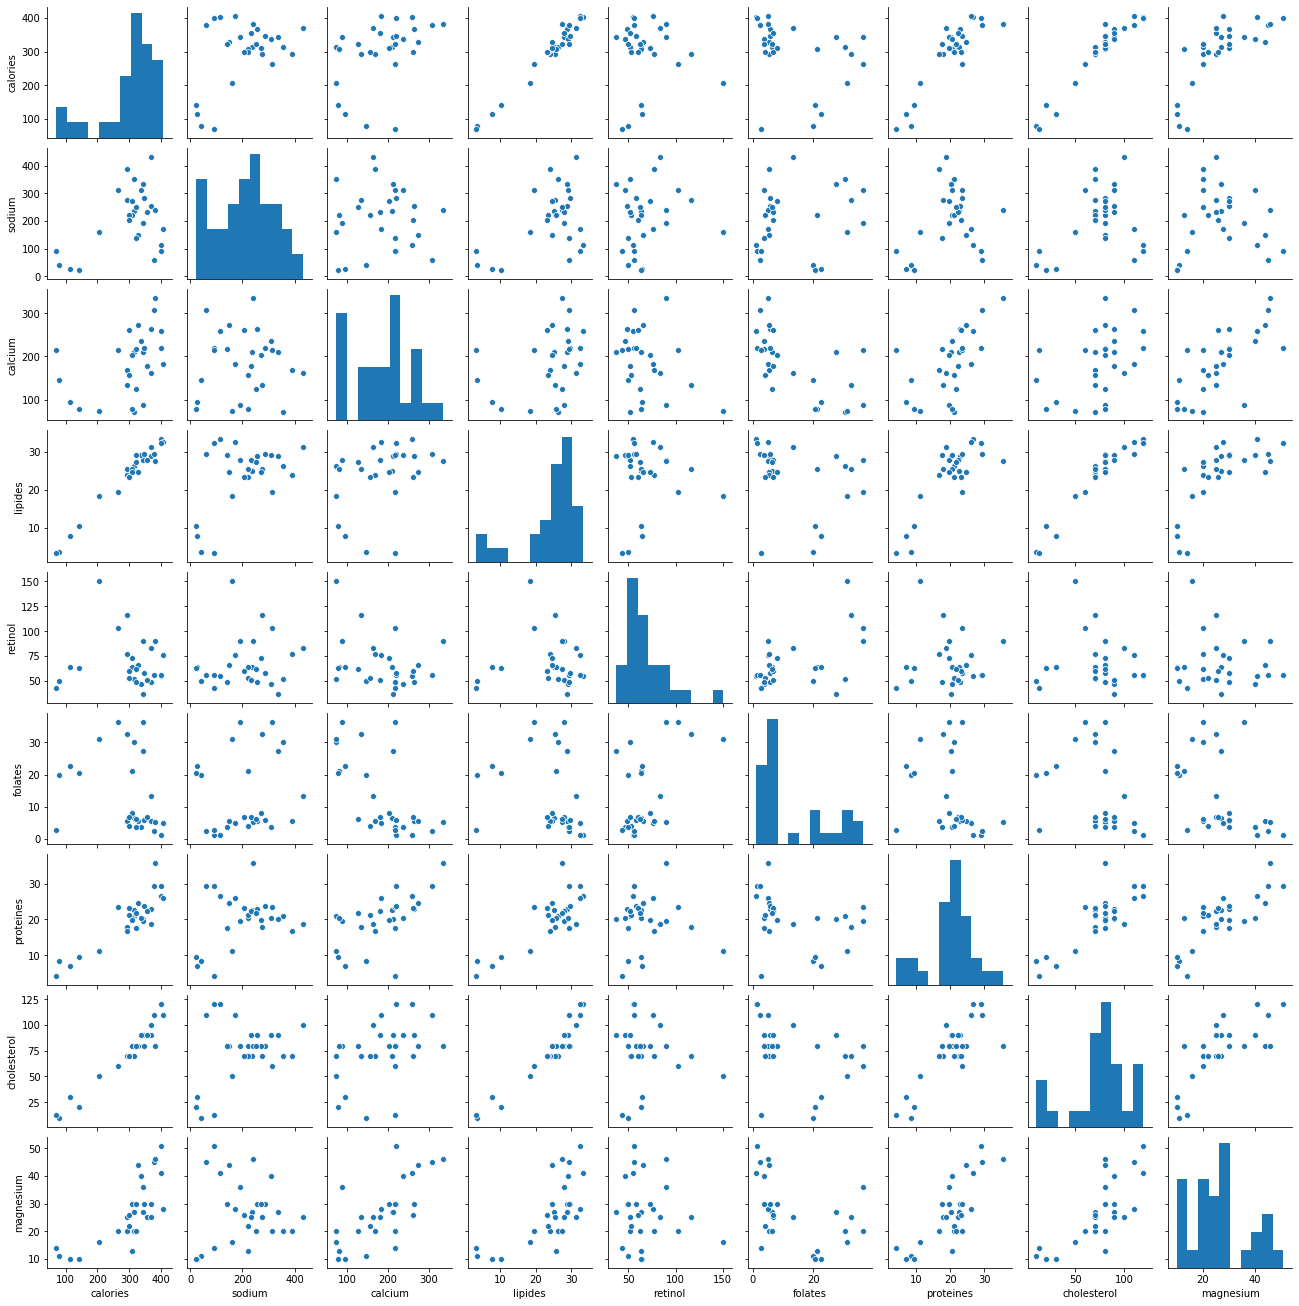

In [17]:
sns.pairplot(df, height = 2, palette = 'colorblind');

Les distributions de variables Magnesium, Cholesterol Proteines pour example, ne sont pas normal distributions, mais il semble aussi que represents differents reagruopment de donnes, au moins deux ensemble de donnes.
L'exception a cettte comportement cest Sodium, Retinol et Calories.

La variable est importante, dans la measure ou soit plus utile dans la differenciacion de clusters, a mon avis ou les donnes sont distribues uniformement entre les subsets.  Magnesium, Folates, Lipidos et Calcium.


In [23]:
df1 = df[['lipides', 'proteines']]
fn = ['lipides', 'proteines']
df1.head(5)

,lipides,proteines
0,26.3,21.0
1,25.1,22.6
2,33.3,26.6
3,28.9,20.2
4,19.5,23.4


# Étape 2 : Détermination du nombre optimum de groupement

### En se basant sur le diagramme Elbow, représentez et déterminez le nombre optimum de regroupement

Text(0, 0.5, 'Inertia')

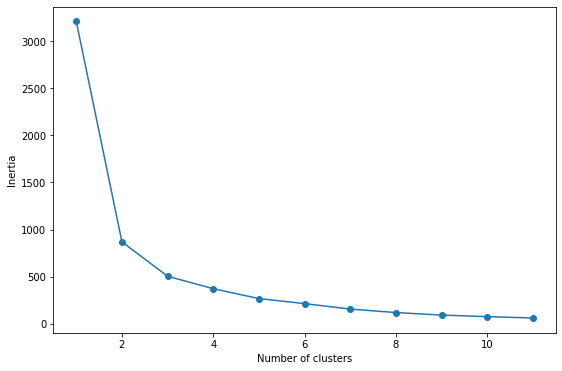

In [26]:
from sklearn.cluster import KMeans
SSE = []
for cluster in range(1,12):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df1)
    SSE.append(kmeans.inertia_)
    
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,12), 'SSE':SSE})
plt.figure(figsize=(9,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [28]:
from kneed import KneeLocator

k1 = KneeLocator(range(1,12), SSE, curve='convex', direction='decreasing')
print('The value of Elbow is:  ', k1.elbow)

The value of Elbow is:   3


The optimal number of cluster its the inflexion point, where the difference in "inertia" ou "cohesion" between subyacent clusters its not big.  

Graphiquement on voit que le optimal cest 3.


# Étape 3 : Regroupement via k−means (16 points)

Nous désirons procéder à un regroupement en 2 clusters

In [51]:
from sklearn.cluster import KMeans

KC = 2
kmeans = KMeans(n_clusters = KC, init = 'random', max_iter=100, n_init=1, random_state=0)
y_kmeans=kmeans.fit_predict(df1)
display(y_kmeans)
print(y_kmeans.shape)
#y_kmeans take values 0,1 when KC=2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1])

(29,)


In [63]:
import collections
k = y_kmeans
collections.Counter(k)

Counter({0: 24, 1: 5})

Ilya 24 samples dans Cluster 0 et 5 samples dans Cluster 1

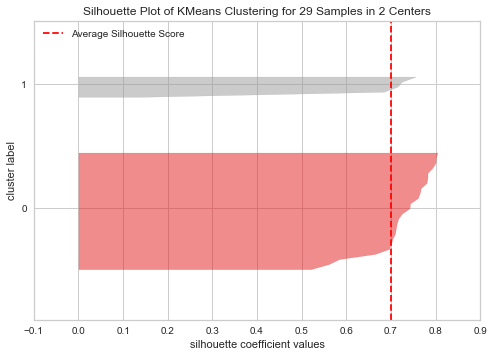

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer

model = SilhouetteVisualizer(KMeans(2))
model.fit(df1)
model.show()

Les deux cluster sont tellemente differents relies a sont distribution de quantite de donnes dans chaque cluster, tel condition cest n'est pas convenible, on dois augmenter le numero de clusters sans sacrifier le score moyenne.  Les deux cluster sont sur le score, donc ilya confiance dans la classifications dans les deux clusters.



In [50]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df1, kmeans.labels_)
print("Silhouette Coefficient", score)

Silhouette Coefficient 0.7010751119942187


In [54]:
from sklearn.cluster import KMeans

KC2 = 3
kmeans2 = KMeans(n_clusters = KC2, init = 'random', max_iter=100, n_init=1, random_state=0)
y_kmeans2=kmeans2.fit_predict(df1)
display(y_kmeans2)
print(y_kmeans2.shape)
#y_kmeans take values 0,1 when KC=2

array([2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 1])

(29,)


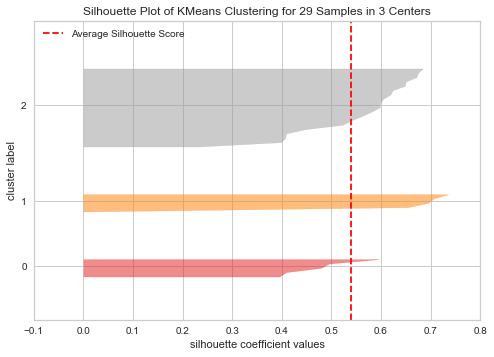

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer

model = SilhouetteVisualizer(KMeans(3))
model.fit(df1)
model.show()

In [57]:
from sklearn.metrics import silhouette_score

score2 = silhouette_score(df1, kmeans2.labels_)
print("Silhouette Coefficient", score2)

Silhouette Coefficient 0.5390591444874956


In [66]:
import collections
k = y_kmeans2
collections.Counter(k)

Counter({2: 19, 0: 5, 1: 5})

Cluster 2: 19
Cluster 1: 5
Cluster 0: 5
    

Le coefficient de silhouette est positive mais bas, ca veut dire la cohesion entre inter-clusters n'est pas forte, mais ilya une classification visible.   Si bien la concentraction de donnes dans une seul cluster cest mineur respect au premiere example, la densite de donnes dans le cluster deux, nous invite a inserer de variables characterisiques que permet de differencier mieux le ensemble de donnes.

Les variables lypides et Proteines, permets bien de classifier certaines types de frommages mais pas tous.

Les deux modeles sont bonnes modeles de classification en dependant de besoin.